# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# format the numerical tick label for UnitPrice
from matplotlib.ticker import ScalarFormatter

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [3]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', sep=',', encoding='latin1')
online_rt.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [4]:
no_uk = online_rt[online_rt.Country != 'United Kingdom']
top_10_countries = no_uk[['Country', 'Quantity']].groupby('Country').sum().sort_values('Quantity', ascending=False).head(10)
top_10_countries

,Quantity
Country,
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824
Japan,25218


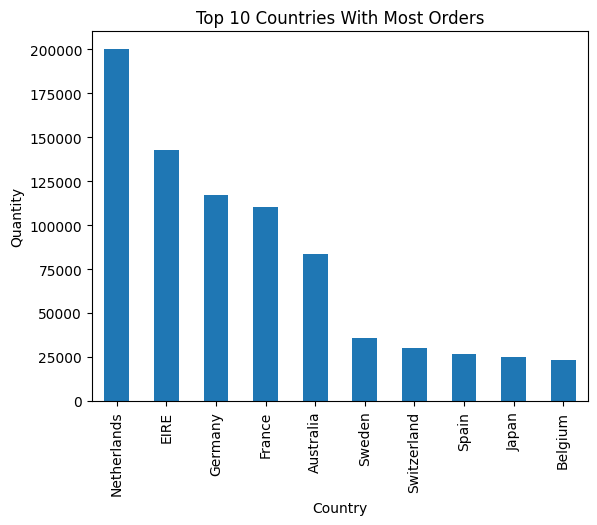

In [5]:
top_10_countries['Quantity'].plot(kind='bar')

plt.xlabel("Country")
plt.ylabel("Quantity")
plt.title("Top 10 Countries With Most Orders")

plt.show()

### Step 5.  Exclude negative Quantity entries

In [6]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [7]:
# How does quantity relate to unit price per customer, broken down by country?
# Group data by customer and country
customers = online_rt.groupby(['CustomerID', 'Country']).sum()
customers = customers[['Quantity', 'UnitPrice']]
# Ensure there are no negative quantities
customers = customers[customers.Quantity > 0]
customers.head()

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


In [8]:
# After the groupby, Country is part of the index, not a column. 
print(customers.index)

MultiIndex([(12346.0, 'United Kingdom'),
            (12347.0,        'Iceland'),
            (12348.0,        'Finland'),
            (12349.0,          'Italy'),
            (12350.0,         'Norway'),
            (12352.0,         'Norway'),
            (12353.0,        'Bahrain'),
            (12354.0,          'Spain'),
            (12355.0,        'Bahrain'),
            (12356.0,       'Portugal'),
            ...
            (18273.0, 'United Kingdom'),
            (18274.0, 'United Kingdom'),
            (18276.0, 'United Kingdom'),
            (18277.0, 'United Kingdom'),
            (18278.0, 'United Kingdom'),
            (18280.0, 'United Kingdom'),
            (18281.0, 'United Kingdom'),
            (18282.0, 'United Kingdom'),
            (18283.0, 'United Kingdom'),
            (18287.0, 'United Kingdom')],
           names=['CustomerID', 'Country'], length=4347)


In [9]:
# Put Country back to a column (right-end of df)
customers['Country'] = customers.index.get_level_values(1)
customers.head()

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12346.0,United Kingdom,74215,1.04,United Kingdom
12347.0,Iceland,2458,481.21,Iceland
12348.0,Finland,2341,178.71,Finland
12349.0,Italy,631,605.10,Italy
12350.0,Norway,197,65.30,Norway


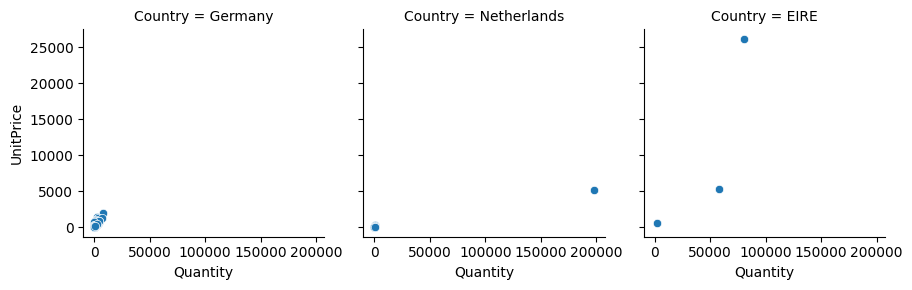

In [10]:
# Filter the dataset to the top 3 countries listed in top_10_countries
top_3_countries = ['Netherlands', 'EIRE', 'Germany']
customers = customers[customers.Country.isin(top_3_countries)]
# FacetGrid: multiple plots side by side, one per country.
g = sns.FacetGrid(customers, col="Country")
g.map(sns.scatterplot, "Quantity", "UnitPrice", alpha=1)
g.add_legend()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [11]:
customers = online_rt.groupby(['CustomerID', 'Country']).sum()
customers = customers[['Quantity', 'UnitPrice']]
customers.head()

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [12]:
customers.UnitPrice.dtype
# Summing 'UnitPrice' after grouping by customer is misleading. 
# 'UnitPrice' is the price per item, not the total spent.
# Summing 'UnitPrice' for a customer just adds up all the prices of items they bought, but doesn’t tell how much money they spent.

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [13]:
display(online_rt[online_rt.CustomerID == 12346.0].sort_values(by='Quantity', ascending=False).head())

display(online_rt[online_rt.CustomerID == 12347.0].sort_values(by='Quantity', ascending=False).head())

# Customer 12346.0 placed one giant order, whereas 12347.0 placed a lot of smaller orders.
# The scatterplot is misleading because UnitPrice was summed per customer instead of using the actual unit prices,
# distorting the relationship between quantity and price.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
148290,549222,23076,ICE CREAM SUNDAE LIP GLOSS,240,4/7/11 10:43,1.04,12347.0,Iceland
428974,573511,23084,RABBIT NIGHT LIGHT,48,10/31/11 12:25,1.79,12347.0,Iceland
148303,549222,22492,MINI PAINT SET VINTAGE,36,4/7/11 10:43,0.65,12347.0,Iceland
220583,556201,17021,NAMASTE SWAGAT INCENSE,36,6/9/11 13:01,0.30,12347.0,Iceland
428983,573511,22492,MINI PAINT SET VINTAGE,36,10/31/11 12:25,0.65,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [14]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)
top_3_countries = sales_volume.iloc[1:4].index
top_3_countries

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [15]:
online_rt = online_rt[online_rt.Quantity > 0]

online_rt['Revenue'] = online_rt.UnitPrice * online_rt.Quantity
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [16]:
top_3_countries = ['Netherlands', 'EIRE', 'Germany']

top_3_countries_customers = online_rt[online_rt.Country.isin(top_3_countries)]

top_3_countries_customers = top_3_countries_customers.groupby(['CustomerID', 'Country']).agg({
    'Revenue': 'sum', # Total money spent by each customer in each country
    'Quantity': 'sum', # Total number of items bought by each customer in each country
    'UnitPrice': 'mean' # Average price per item paid by each customer in each country
})

top_3_countries_customers.head()

,,Revenue,Quantity,UnitPrice
CustomerID,Country,,,
12426.0,Germany,582.73,258,3.936333
12427.0,Germany,825.80,533,4.589032
12468.0,Germany,729.54,366,3.515000
12471.0,Germany,19824.05,8212,4.300370
12472.0,Germany,6572.11,4148,2.397670


##### Step 7.3.3 Plot

In [17]:
# Put Country back to a column (right-end of df)
top_3_countries_customers['Country'] = top_3_countries_customers.index.get_level_values(1)
top_3_countries_customers

,,Revenue,Quantity,UnitPrice,Country
CustomerID,Country,,,,
12426.0,Germany,582.73,258,3.936333,Germany
12427.0,Germany,825.80,533,4.589032,Germany
12468.0,Germany,729.54,366,3.515000,Germany
12471.0,Germany,19824.05,8212,4.300370,Germany
12472.0,Germany,6572.11,4148,2.397670,Germany
...,...,...,...,...,...
14016.0,EIRE,4341.21,2125,3.949565,EIRE
14156.0,EIRE,117379.63,57885,3.826914,EIRE
14335.0,Germany,468.26,379,2.289524,Germany


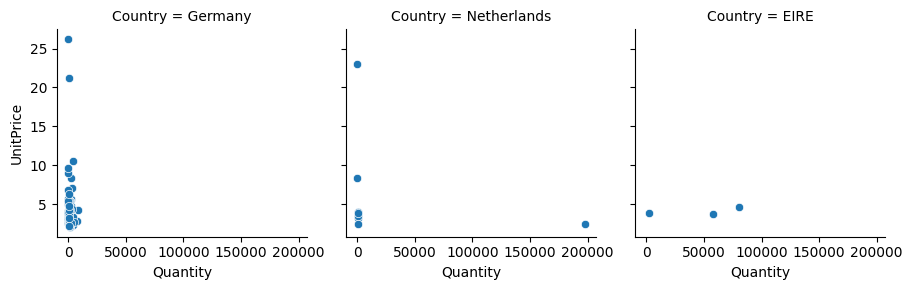

In [18]:
g = sns.FacetGrid(top_3_countries_customers, col="Country")
g.map(sns.scatterplot, "Quantity", "UnitPrice", alpha=1)
g.add_legend()

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

In [19]:
customers = online_rt.copy()
customers = customers.groupby('CustomerID').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
})
customers['AvgPrice'] = customers.Revenue / customers.Quantity
customers.reset_index(inplace=True)
customers

,CustomerID,Revenue,Quantity,AvgPrice
0,12346.0,77183.60,74215,1.040000
1,12347.0,4310.00,2458,1.753458
2,12348.0,1797.24,2341,0.767723
3,12349.0,1757.55,631,2.785341
4,12350.0,334.40,197,1.697462
...,...,...,...,...
4334,18280.0,180.60,45,4.013333
4335,18281.0,80.82,54,1.496667
4336,18282.0,178.05,103,1.728641
4337,18283.0,2094.88,1397,1.499556


<Axes: xlabel='Quantity', ylabel='AvgPrice'>

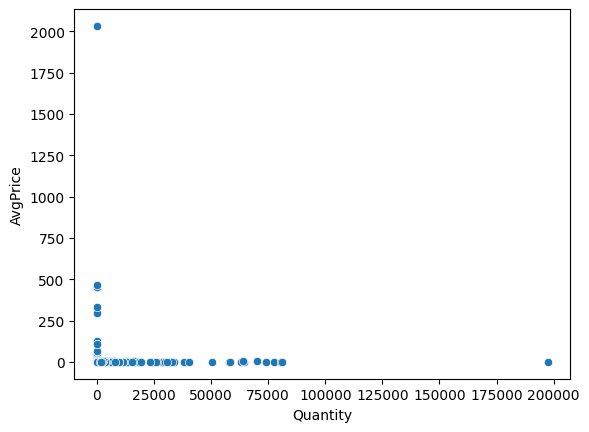

In [20]:
sns.scatterplot(x='Quantity', y='AvgPrice', data=customers)

##### Step 7.4.2 Zoom in so we can see that curve more clearly

[]

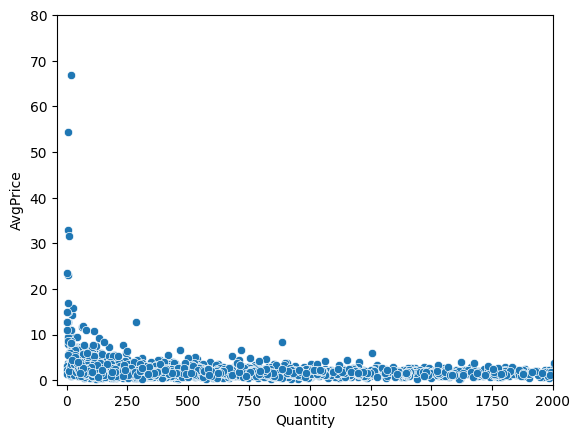

In [21]:
# zoom in by setting the axis limits
sns.scatterplot(x='Quantity', y='AvgPrice', data=customers)
plt.xlim(-40,2000) 
plt.ylim(-1,80)
plt.plot()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [22]:
price_start = 0
price_end = 50
price_interval = 1

# Create price buckets
buckets = np.arange(price_start, price_end, price_interval)
buckets

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [23]:
# Assign each row to a price bucket based on its UnitPrice
online_rt['range'] = pd.cut(online_rt.UnitPrice, buckets)
online_rt[['UnitPrice', 'range']]

,UnitPrice,range
0,2.55,"(2, 3]"
1,3.39,"(3, 4]"
2,2.75,"(2, 3]"
3,3.39,"(3, 4]"
4,3.39,"(3, 4]"
...,...,...
541904,0.85,"(0, 1]"
541905,2.10,"(2, 3]"
541906,4.15,"(4, 5]"
541907,4.15,"(4, 5]"


In [24]:
# Group by price range and sum Revenue
revenue_per_price = online_rt.groupby('range').Revenue.sum().sort_index()
revenue_per_price

/var/folders/46/mbfqnkdd62vdn30kdy8gwlxc0000gn/T/ipykernel_49632/1177144308.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_per_price = online_rt.groupby('range').Revenue.sum().sort_index()


range
(0, 1]      1107774.544
(1, 2]      2691765.110
(2, 3]      2024143.090
(3, 4]       865101.780
(4, 5]      1219377.050
(5, 6]       391001.440
(6, 7]       268922.630
(7, 8]       306205.230
(8, 9]       380043.780
(9, 10]      163837.730
(10, 11]     238086.810
(11, 12]      25263.810
(12, 13]     201834.290
(13, 14]      10601.790
(14, 15]      74428.790
(15, 16]      21168.790
(16, 17]      83848.440
(17, 18]      36664.180
(18, 19]        728.190
(19, 20]      17771.430
(20, 21]      21066.670
(21, 22]       2990.410
(22, 23]         23.000
(23, 24]         23.530
(24, 25]      42633.490
(25, 26]      12006.290
(26, 27]        134.180
(27, 28]       8904.000
(28, 29]         28.660
(29, 30]       8258.540
(30, 31]          0.000
(31, 32]          0.000
(32, 33]       2942.410
(33, 34]       5186.970
(34, 35]       9399.530
(35, 36]       2870.200
(36, 37]        181.590
(37, 38]         74.960
(38, 39]         38.260
(39, 40]      20749.790
(40, 41]         80.920
(41, 42]  

In [25]:
revenue_per_price = revenue_per_price.reset_index()
revenue_per_price

,range,Revenue
0,"(0, 1]",1107774.544
1,"(1, 2]",2691765.110
2,"(2, 3]",2024143.090
3,"(3, 4]",865101.780
4,"(4, 5]",1219377.050
5,"(5, 6]",391001.440
6,"(6, 7]",268922.630
7,"(7, 8]",306205.230
8,"(8, 9]",380043.780
9,"(9, 10]",163837.730


#### 8.3 Plot.

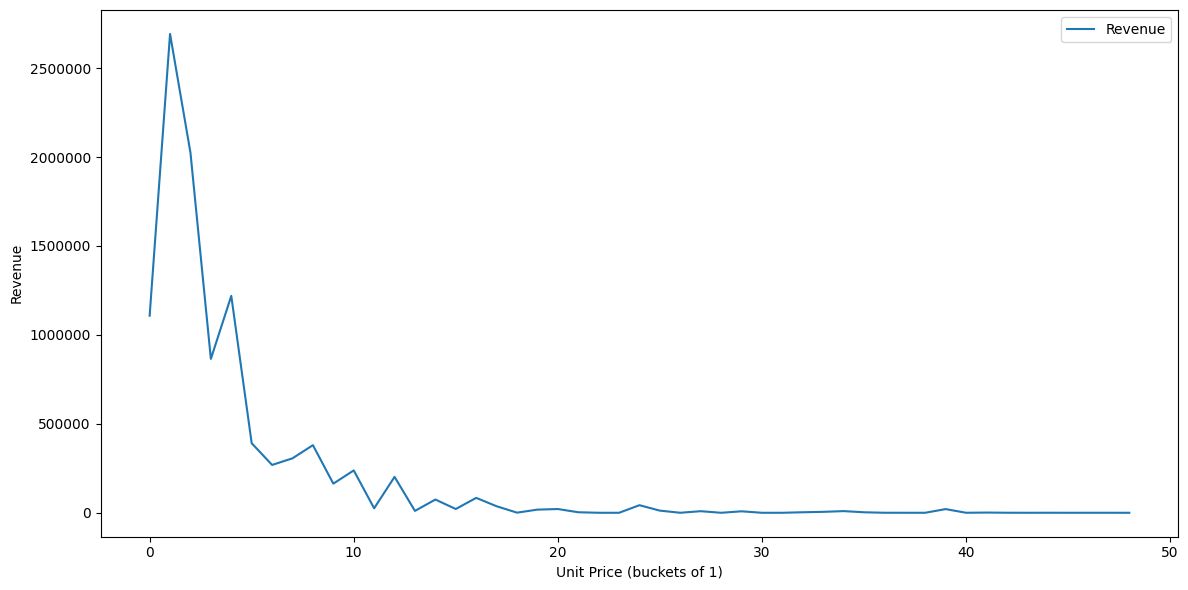

In [26]:
ax = revenue_per_price.plot(
    figsize=(12, 6),
    xlabel=f'Unit Price (buckets of {price_interval})',
    ylabel='Revenue'
)

# Force y-axis to show full numbers
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # Disable scientific notation

plt.tight_layout()
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

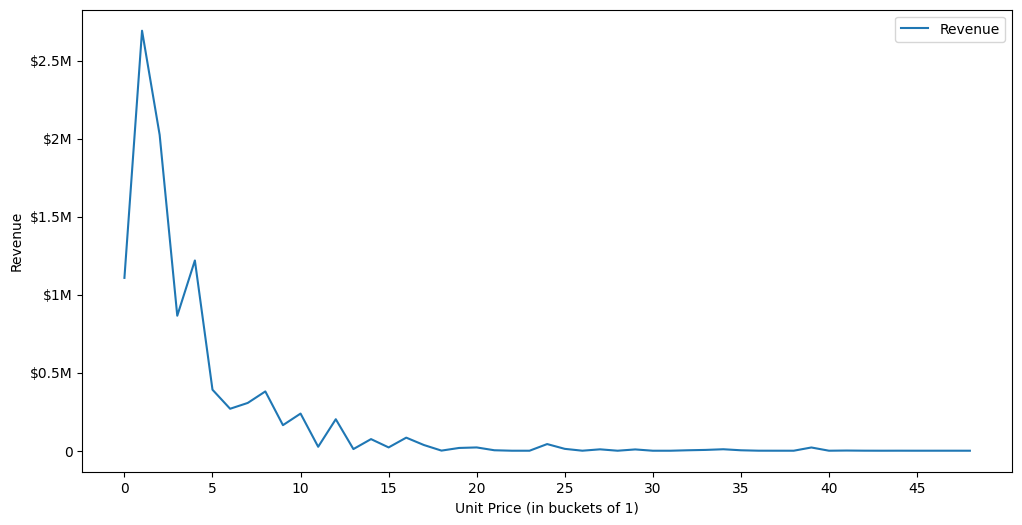

In [27]:
# Plot revenue per price bucket
ax = revenue_per_price.plot(figsize=(12, 6))

# Axis labels
ax.set_xlabel(f'Unit Price (in buckets of {price_interval})')
ax.set_ylabel('Revenue')

# Set x-axis ticks every 5 units
xticks = np.arange(price_start, price_end, 5)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

# Sets x-axis ticks every 5 units from price_start to price_end instead of 1 unit to avoid cluttering
plt.xticks(np.arange(price_start,price_end,5),
           np.arange(price_start,price_end,5))
# Sets y-axis ticks at in millions for easier reading
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

# Most of the revenue comes from lower-priced items.

### BONUS: Create your own question and answer it.

In [29]:
# Question: What are the top 10 best-selling products in the UK market,
# and how do their sales volumes compare to their revenue generation?

# 1. Get top 10 products in the UK by quantity sold
uk_sales = online_rt[online_rt['Country'] == 'United Kingdom']

top_10_items = uk_sales.groupby('Description', as_index=False).agg({
    'Quantity': 'sum', # total quantity sold
    'Revenue': 'sum' # total revenue earned
})
top_10_items = top_10_items.sort_values('Quantity', ascending=False).head(10)
top_10_items


,Description,Quantity,Revenue
2390,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
2055,MEDIUM CERAMIC TOP STORAGE JAR,77036,80575.63
3931,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49526,12309.88
1819,JUMBO BAG RED RETROSPOT,44268,86471.34
3842,WHITE HANGING HEART T-LIGHT HOLDER,35744,100497.72
2680,POPCORN HOLDER,34738,32709.32
227,ASSORTED COLOUR BIRD ORNAMENT,33735,54756.79
2306,PACK OF 12 LONDON TISSUES,25331,7647.80
2340,PACK OF 72 RETROSPOT CAKE CASES,24986,15754.07
3674,VICTORIAN GLASS HANGING T-LIGHT,23692,32321.57


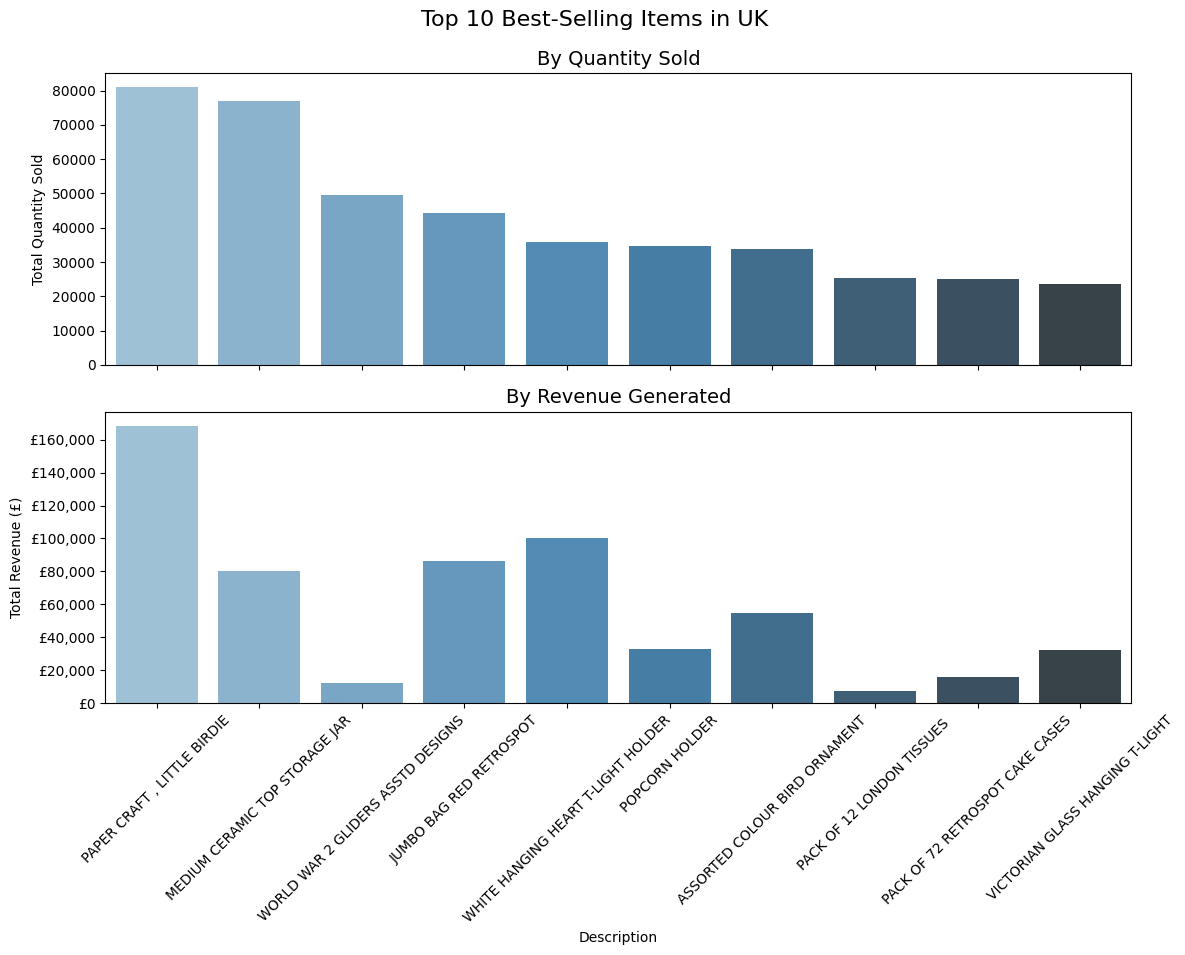

In [30]:
# 2. Set up figure & subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Top 10 Best-Selling Items in UK', fontsize=16, y=0.95)

# 3. Define a color palette for consistency
palette = sns.color_palette("Blues_d", n_colors=10)

# --- Plot 1: Quantity sold ---
sns.barplot(
    data=top_10_items,
    x='Description', y='Quantity',
    hue='Description',
    ax=axes[0],
    legend=False,
    palette=palette
)
axes[0].set_title('By Quantity Sold', fontsize=14)
axes[0].set_ylabel('Total Quantity Sold')
axes[0].tick_params(axis='x', rotation=45)

# --- Plot 2: Revenue generated ---
sns.barplot(
    data=top_10_items,
    x='Description', y='Revenue',
    hue='Description',
    ax=axes[1],
    legend=False,
    palette=palette
)
axes[1].set_title('By Revenue Generated', fontsize=14)
axes[1].set_ylabel('Total Revenue (£)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{x:,.0f}'))

# 4. Final layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()

# While certain items may have high sales quantities, 
# they don't necessarily generate proportional revenue.
# Lower-volume items can achieve similar or higher revenue through premium pricing.